1. Scikilearn 으로 보스턴 주택가격 데이터 회귀분석
2. statmodels 패키지로 선형회귀 분석

In [302]:
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
%matplotlib inline

# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'  # Mac (AppleGothic 또는 AppleSDGothicNeo)
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (NanumGothic 또는 다른 설치된 한글 폰트)

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
# plt.title('한글 타이틀...')

# Scikilearn 으로 보스턴 주택가격 데이터 회귀분석


<img src='https://i.imgur.com/WuRWciF.png' width=700>

### 데이터 (원본)

boston housing price 원본 데이터

In [303]:
# boston housing price 원본 데이터
import pandas as pd
import numpy as np

data_url = "https://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 이 이름은 추후 모델 호출시에도 이 순서로 적용되므로 참고!!
# 모델 호출시 이 순서대로 집어 넣고, 없거나 넣지 않을 값은 0으로 임의 설정
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

In [304]:
boston_df = pd.DataFrame(data, columns=feature_names)
boston_df['TARGET'] = target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [305]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


데이터 피처의 속성의미는:

- CRIM: 지역별 범죄 발생률
- ZN: 25000평방미터를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS:찰스강에 대한 더미 변수 (강의 경계에 위치한 경우 1, 아니면 0)
- NOX: 일산화질수 농도
- RM: 거주할 수 있는 방의 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- RAD: 고속도록 접근 용이성
- TAX: 10000달러 당 재산세 비율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- TARGET: 주택 가격

In [306]:
boston_df.B.describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

#### 주요 피처 확인하기

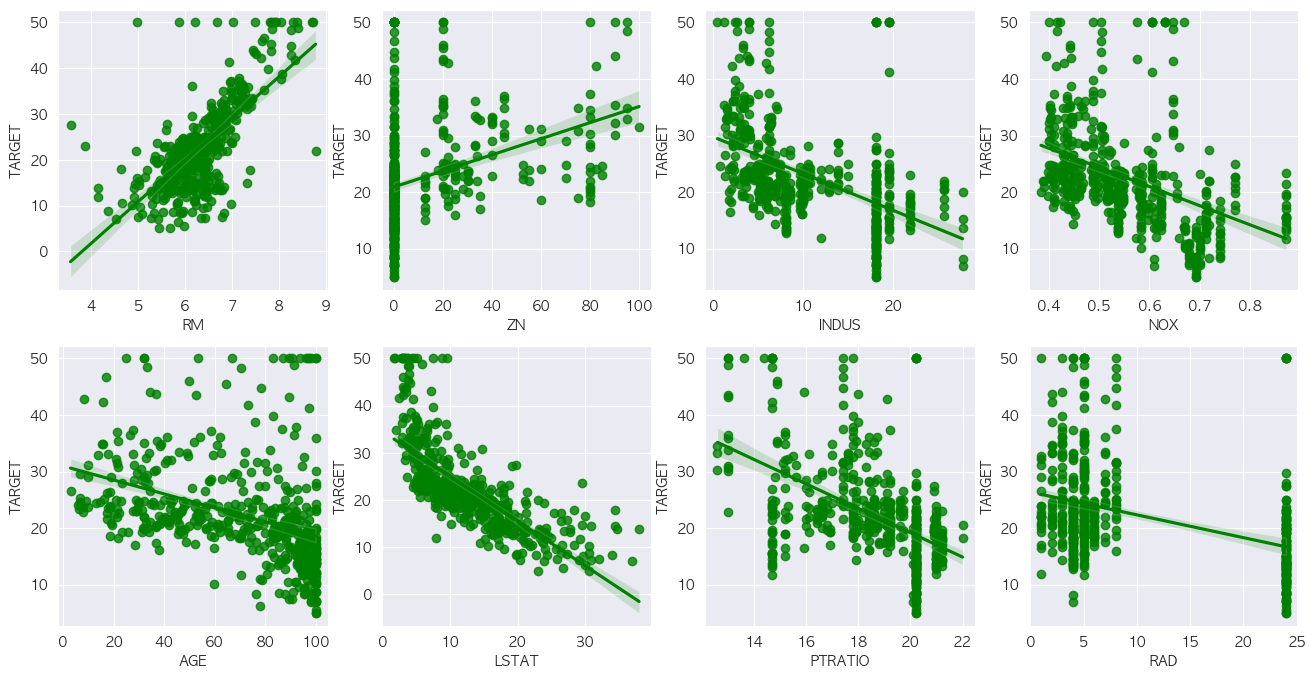

In [307]:
import seaborn as sns

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'LSTAT', 'PTRATIO', 'RAD']
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)

for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    # print(row, col)
    sns.regplot(ax=axs[row][col], x=feature, y='TARGET', data=boston_df, color='g')

파이썬 연속적인 데이터 배열, collection, iterable
- 순서대로 배치 되어 있다.

주요 피처의 산점도와 회귀직선을 보면 RM, LSTAT 의 PRICE 영향도가 가장 두드러 지는 것으로 보인다.
 - RM 방크기: 방의 크기가 클수록 가격이 증가하는 **양방향의 선형성(Positive linearity)**를 보인다.
 - LSTAT 하위계측 비율: LSTAT이 적을수록 PRICE가 증가하는 **음 방향의 선형성**을 보인다.

# 1. 단일 특성 선형회귀 분석

선형회귀 분석이란 선형모델 예측과 평가를 수행하는 것이다. 여기서 RM 변수와 target과의 회귀 관계를 분석해 보자.


#### `RM` 지표

LinearRgression으로 보스턴 주택 데이터에서회귀 모델을 만들고  RM 피처 평가지표를 검토해 보자

In [308]:
# X_train = data[:, 5]# 학습 데이터의 전체 행, 5번 열
X_train = boston_df.RM.values # RM 열
y_train = target # target 데이터

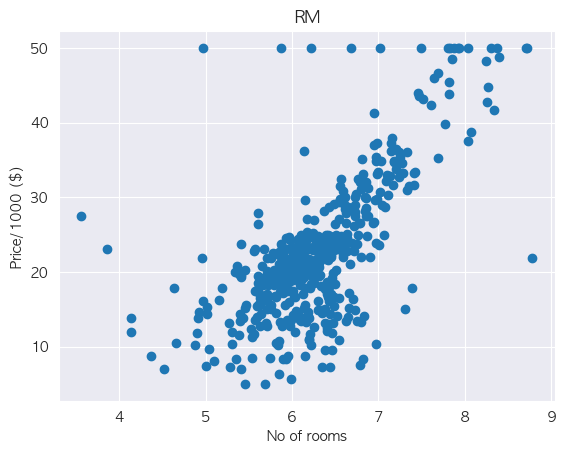

In [309]:
import matplotlib.pyplot as plt

# X_train, target 산점도 그리기
plt.scatter(X_train, y_train)

plt.xlabel("No of rooms")
plt.ylabel("Price/1000 ($)")
plt.title('RM')
plt.show()

모델 작성과 학습

In [310]:
X_train.shape

(506,)

In [311]:
# Linear Regression OLS로 학습/예측/평가 수행. 
from sklearn.linear_model import LinearRegression

#LinearRegression
lg_clf = LinearRegression()

# 학습 진행
lg_clf.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [312]:
# 최종 목적은 회귀 선을 위한 가중치와 절편을 구하는 것
print("모델의 가중치 :", lg_clf.coef_)
print("모델의 절편 :", lg_clf.intercept_)

모델의 가중치 : [9.10210898]
모델의 절편 : -34.670620776438554


LinearRegressor의 OLS로 해는 아래 식으로 y를 예측 한다는 것이다.

$$
\hat{y} = -34.67 + 9.1 x
$$

만들어진 모델의 회귀선 확인

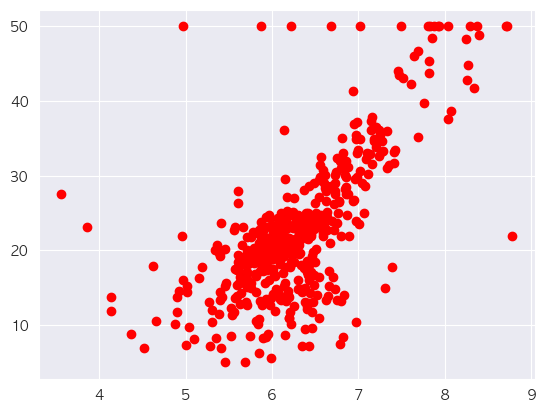

In [313]:
# 실제 학습 데이터와 회귀선
import numpy as np
# X축
x = np.linspace(0, 100, 100)

# X_train, target 산점도를 그려 봅니다.
plt.scatter(X_train, y_train, c='r')

# 회귀선
# 우리 모델의 예측값

plt.show()

#### 단일특성 평가지표

- MSE
- RMSE
- R2

In [314]:
# X_train
y_pred = lg_clf.predict(X_train.reshape(-1,1))

In [315]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("MSE :", mean_squared_error(y_train, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_train, y_pred)))
print("R2 :", r2_score(y_train, y_pred))
print("MAE :", mean_absolute_error(y_train, y_pred))

MSE : 43.60055177116956
RMSE : 6.603071389222561
R2 : 0.48352545599133423
MAE : 4.4477729015322325


## 실습 LSTAT 지표
LSTAT 으로 학습하고 평가지표 산출

In [316]:
X_train2 = boston_df.LSTAT.values # LSTAT 열
y_train2 = target # target 데이터

In [317]:
from sklearn.linear_model import LinearRegression

#LinearRegression
lg_clf2 = LinearRegression()

# 학습 진행
lg_clf2.fit(X_train2.reshape(-1,1), y_train2)

LinearRegression()

In [318]:
# X_train
y_pred2 = lg_clf2.predict(X_train2.reshape(-1,1))

In [319]:
print("모델의 가중치 :", lg_clf2.coef_)
print("모델의 절편 :", lg_clf2.intercept_)

모델의 가중치 : [-0.95004935]
모델의 절편 : 34.5538408793831


In [320]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("MSE :", mean_squared_error(y_train2, y_pred2))
print("RMSE :", np.sqrt(mean_squared_error(y_train2, y_pred2)))
print("R2 :", r2_score(y_train2, y_pred2))
print("MAE :", mean_absolute_error(y_train2, y_pred2))

MSE : 38.48296722989415
RMSE : 6.20346413142642
R2 : 0.5441462975864797
MAE : 4.505281166250568


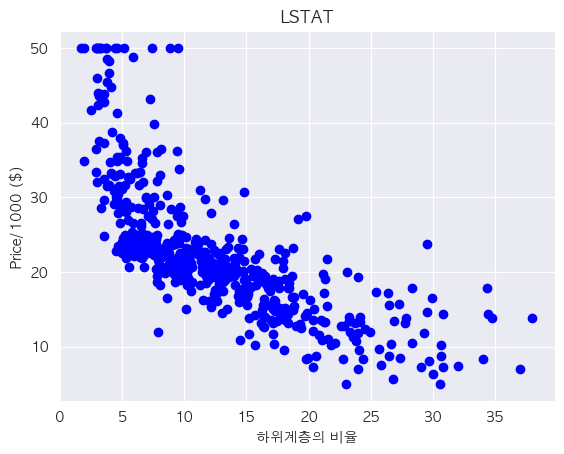

In [321]:
# 실제 학습 데이터와 회귀선
import numpy as np

# X축
x = np.linspace(0, 100, 100)

# X_train, target 산점도를 그려 봅니다.
plt.scatter(X_train2, y_train2, c='b')
plt.xlabel("하위계층의 비율")
plt.ylabel("Price/1000 ($)")
plt.title('LSTAT')
# 회귀선
# 우리 모델의 예측값

plt.show()

## AGE 지표

모델의 가중치 : [-0.12316272]
모델의 절편 : 30.97867776261804
MSE : 72.42398092899336
RMSE : 8.510228018625197
R2 : 0.14209474407780465
MAE : 5.984744717749342


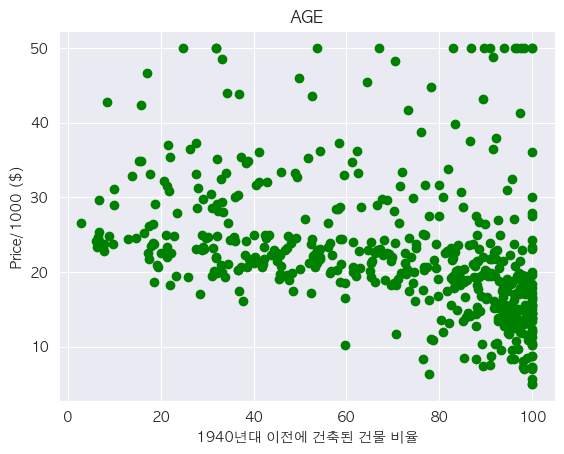

In [322]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train3 = boston_df.AGE.values  # AGE 열
y_train3 = target  # target 데이터

#LinearRegression
lg_clf3 = LinearRegression()

# 학습 진행
lg_clf3.fit(X_train3.reshape(-1, 1), y_train3)
# X_train
y_pred3 = lg_clf3.predict(X_train3.reshape(-1, 1))
print("모델의 가중치 :", lg_clf3.coef_)
print("모델의 절편 :", lg_clf3.intercept_)

print("MSE :", mean_squared_error(y_train3, y_pred3))
print("RMSE :", np.sqrt(mean_squared_error(y_train3, y_pred3)))
print("R2 :", r2_score(y_train3, y_pred3))
print("MAE :", mean_absolute_error(y_train3, y_pred3))
# 실제 학습 데이터와 회귀선

# X축
x = np.linspace(0, 100, 100)

# X_train, target 산점도를 그려 봅니다.
plt.scatter(X_train3, y_train3, c='g')
plt.xlabel("1940년대 이전에 건축된 건물 비율")
plt.ylabel("Price/1000 ($)")
plt.title('AGE')
# 회귀선
# 우리 모델의 예측값

plt.show()

# 2. 다중 특성 선형 회귀 분석

boston 데이터 셋 모든 특성을 이용한 다중 특성 데이터 예측

특성이 n개 일 경우에 (다항식) 알아야 할 파라미터는 n+1 개 이다. Scikit-learn 은 다변수(다항)도 동일하게 다룰 수 있다.

In [323]:
from sklearn.model_selection import train_test_split

# data, target 을 7:3으로 훈련데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=50)
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [324]:
# 학습 진행
# 학습 데이터와 학습 라벨
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [325]:
# 가중치와 절편
print("모델의 가중치 :", reg_all.coef_)
print("모델의 절편 :", reg_all.intercept_)

모델의 가중치 : [-1.02245423e-01  3.11044112e-02  1.43693788e-02  1.65964577e+00
 -1.58693910e+01  5.03222436e+00 -7.16365483e-04 -1.31353766e+00
  2.55945159e-01 -1.23369178e-02 -9.03145563e-01  9.65756208e-03
 -4.22793524e-01]
모델의 절편 : 25.469528442762964


### 선형회귀 평가

회귀계수 coef_ 에 피처 값을 매핑하고 큰 값 순서로 출력해 보면 - RM 이 양의 값으로 가장 크고, NOX 가 음 값이 너무 커 보인다.

In [326]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coef_df = pd.Series(data = np.round(reg_all.coef_, 1), index = feature_names)
coef_df.sort_values(ascending=False)

RM          5.0
CHAS        1.7
RAD         0.3
ZN          0.0
INDUS       0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.4
PTRATIO    -0.9
DIS        -1.3
NOX       -15.9
dtype: float64

In [327]:
# X_test 예측
y_pred_all = reg_all.predict(X_test)

/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [328]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("MSE :", mean_squared_error(y_test, y_pred_all))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_all)))
print("R2 :", r2_score(y_test, y_pred_all))
print("MAE :", mean_absolute_error(y_test, y_pred_all))

MSE : 33.86803399667011
RMSE : 5.819624901715755
R2 : 0.6685538790447977
MAE : 3.6789775344994293


### - 샘플 예측

작은 세트로 예측 수행 - 보스턴 데이터 셋의 첫번째 데이터와 타겟

## 피처를 줄여서
### ZN, LSTAT, RAD 빼고 학습

In [329]:
from sklearn.model_selection import train_test_split

X = boston_df.drop(['ZN', 'NOX', 'RAD', 'TARGET'], axis = 1)

# data, target 을 7:3으로 훈련데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=50)

# 학습 데이터와 학습 라벨
reg_all_miner = LinearRegression()
reg_all_miner.fit(X_train, y_train)

# X_test 예측
y_pred_all = reg_all_miner.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("MSE :", mean_squared_error(y_test, y_pred_all))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_all)))
print("R2 :", r2_score(y_test, y_pred_all))
print("MAE :", mean_absolute_error(y_test, y_pred_all))

MSE : 37.5303593368686
RMSE : 6.1262026849320455
R2 : 0.632712899086998
MAE : 3.7714060688767823


/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [330]:
# 1개의 학습 데이터
print(data[1])
print(target[1])

[2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
 7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
 9.1400e+00]
21.6


In [331]:
# 모델이 예측한 1개 학습 데이터 예측치
print("예측:", reg_all.predict(data[1].reshape(1, 13)))
print("target:", target[1])

예측: [25.27562045]
target: 21.6


# 모델 저장과 탑재

여기서 joblib 을 사용해 모델을 저장하고 다시 탑재해 보자

In [332]:
%pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [333]:
import joblib

# joblib을 사용하여 모델 저장
model_filename = './model/boston_reg_all.joblib'
joblib.dump(reg_all, model_filename)

['./model/boston_reg_all.joblib']

In [334]:
# joblib을 사용하여 모델 불러오기
load_model = None
try:
    load_model = joblib.load(model_filename)
    print(f"{model_filename}이 정상적으로 불러와졌습니다")
except Exception as e:
    print(e)

./model/boston_reg_all.joblib이 정상적으로 불러와졌습니다


In [337]:
type(load_model)

sklearn.linear_model._base.LinearRegression

In [338]:
# 앞의 다중특성 예에서 사용한 원본 데이터 data 사용
sample_train = data[1].reshape(1,13)
sample_y = target[1]

In [342]:
# 불러온 모델로 예측
sample_pred = load_model.predict(sample_train)
print(f"정답 : {sample_y} ---> 예측 : {sample_pred}")

정답 : 21.6 ---> 예측 : [25.27562045]


---

참고
 - ML교안11-Supervised-learning-with-scikit-learn.pdf
 - Machine Learning with Python Sklearn

In [ ]:
# 모델의 순서 파악
